# 목표1 : 아티스트별 순위 언급 횟수를 바탕으로 Top20 아티스트의 횟수를 보여주는 그래프 생성

1. 아티스트별 순위 언급 횟수를 확인한다
2. 순위 언급 횟수를 바탕으로 새로운 xlsx를 생성
3. pie 그래프로 아티스트별 진입 정도를 표현
4. subplots을 사용해 생성한 두 그래프를 하나의 subplot으로 시각화한다

패키지 삽입

In [24]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import sys

그래프 전역 설정

In [25]:
# 폰트 설정
plt.rcParams['font.family'] =  "Malgun Gothic"  # 윈도우 전용

# 글자 크기
plt.rcParams['font.size'] = 10

# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)

# 유니코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

데이터 가져오기

In [26]:
# 동일 폴더에 있는 genie_chart.xlsx 데이터 추출
xlsx = read_excel("C:\\Users\\jehyu\\Desktop\\SemiProject2\\main\\genie_chart.xlsx")
xlsx

,순위,날짜,곡명,아티스트,앨범명
0,1,20230601,퀸카 (Queencard),(여자)아이들,I feel
1,2,20230601,I AM,IVE (아이브),I've IVE
2,3,20230601,Spicy,aespa,MY WORLD - The 3rd Mini Album
3,4,20230601,Kitsch,IVE (아이브),I've IVE
4,5,20230601,UNFORGIVEN (Feat. Nile Rodgers),LE SSERAFIM (르세라핌),UNFORGIVEN
...,...,...,...,...,...
2795,96,20230628,Butter,방탄소년단,Butter
2796,97,20230628,VIBE (Feat. Jimin of BTS),태양,VIBE
2797,98,20230628,Weekend,태연 (TAEYEON),Weekend
2798,99,20230628,Bad,Christopher,Under the Surface


컬럼 데이터 확인

In [27]:
print(xlsx.dtypes)

순위       int64
날짜       int64
곡명      object
아티스트    object
앨범명     object
dtype: object


In [28]:
print(xlsx.columns)

Index(['순위', '날짜', '곡명', '아티스트', '앨범명'], dtype='object')


## 1.아티스트별 순위권 진입 횟수를 확인

In [29]:
# 아티스트별 순위권 진입 횟수를 확인
count = xlsx['아티스트'].value_counts()
count

아티스트
임영웅                   164
IVE (아이브)             140
NewJeans              140
(여자)아이들               112
LE SSERAFIM (르세라핌)    112
                     ... 
박봄 (Park Bom)           1
코요태                     1
다이나믹 듀오                 1
길구봉구                    1
마크툽 (Maktub)            1
Name: count, Length: 89, dtype: int64

head를 사용해 진입 횟수 상위 20위 아티스트만을 추출

In [30]:
xlsx1 = count.head(20)
xlsx1

아티스트
임영웅                   164
IVE (아이브)             140
NewJeans              140
(여자)아이들               112
LE SSERAFIM (르세라핌)    112
Charlie Puth           85
경서                     84
aespa                  64
지아 (Zia)               63
방탄소년단                  62
성시경                    56
BLACKPINK              56
이무진                    56
윤하 (YOUNHA)            56
태연 (TAEYEON)           52
멜로망스 (MeloMance)       50
DK (디셈버)               29
우디 (Woody)             29
잔나비                    29
WSG워너비 (4FIRE)         28
Name: count, dtype: int64

In [31]:
# 아티스트를 index로, 언급횟수를 column으로 갖는 새로운 그래프 생성
new_xlsx=DataFrame({'진입횟수': count})
new_xlsx

,진입횟수
아티스트,
임영웅,164
IVE (아이브),140
NewJeans,140
(여자)아이들,112
LE SSERAFIM (르세라핌),112
...,...
박봄 (Park Bom),1
코요태,1
다이나믹 듀오,1


In [32]:
# 아티스트 또한 column으로 사용해야 그래프를 수월하게 그릴 수 있기 때문에 
# rest_index를 사용해 index를 column으로 변경, 
# 상위 20 아티스트를 보여주는 xlsx 생성
xlsx2 = new_xlsx.reset_index().head(20)
xlsx2

,아티스트,진입횟수
0,임영웅,164
1,IVE (아이브),140
2,NewJeans,140
3,(여자)아이들,112
4,LE SSERAFIM (르세라핌),112
5,Charlie Puth,85
6,경서,84
7,aespa,64
8,지아 (Zia),63
9,방탄소년단,62


In [33]:
# 생성한 xlsx2 데이터를 파일로 저장
xlsx2.to_excel("아티스트별 순위권 진입 횟수.xlsx")

In [34]:
# 데이터 타입 확인
xlsx2.dtypes

아티스트    object
진입횟수     int64
dtype: object

## 2.`barplot()` 함수를 사용해 아티스트별 그래프를 작성

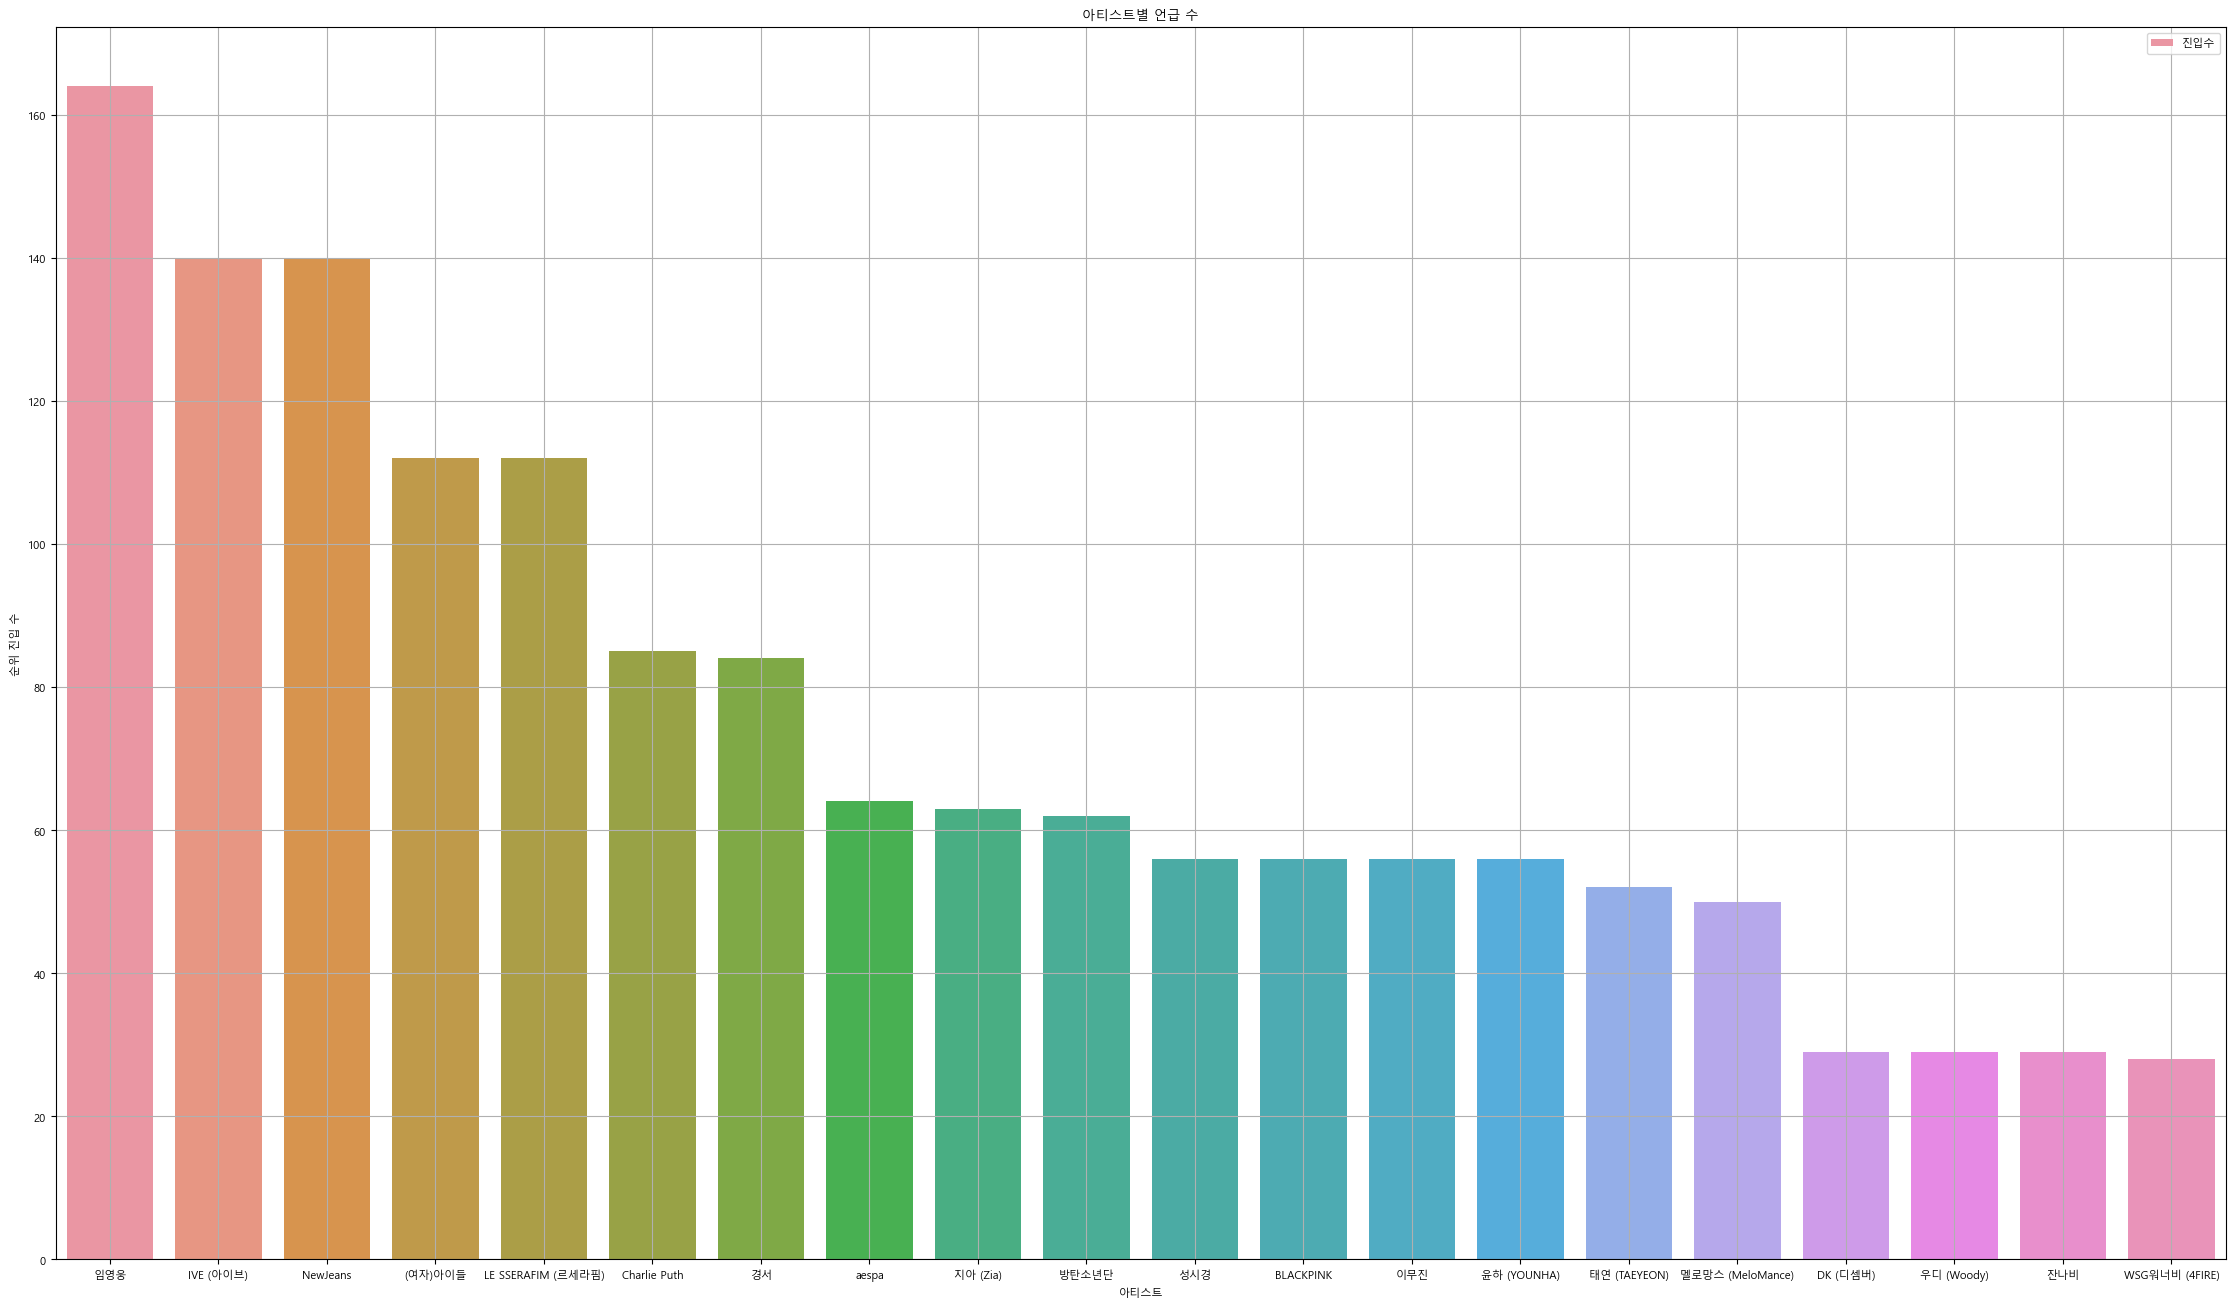

In [35]:
# 글자 크기
plt.rcParams['font.size'] = 8
# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (28, 16)

sb.barplot(data=xlsx2, x="아티스트", y="진입횟수", label='진입수')
plt.title("아티스트별 언급 수")
plt.grid()
plt.legend()
plt.xlabel("아티스트")
plt.ylabel("순위 진입 수")
plt.show()
plt.close()

## 2.`Pie Plot`

In [36]:
# Pie Plot의 label을 생성 (아티스트)
artistList = []
for artist in xlsx2['아티스트']:
    artistList.append(artist)
# print(artistList)

# 1순위 아티스트만 도드라지도록 표시
explodeList = []
for i in range(20):
    if i == 0:
        explodeList.append(0.3)
    else:
        explodeList.append(0)
# print(explodeList)

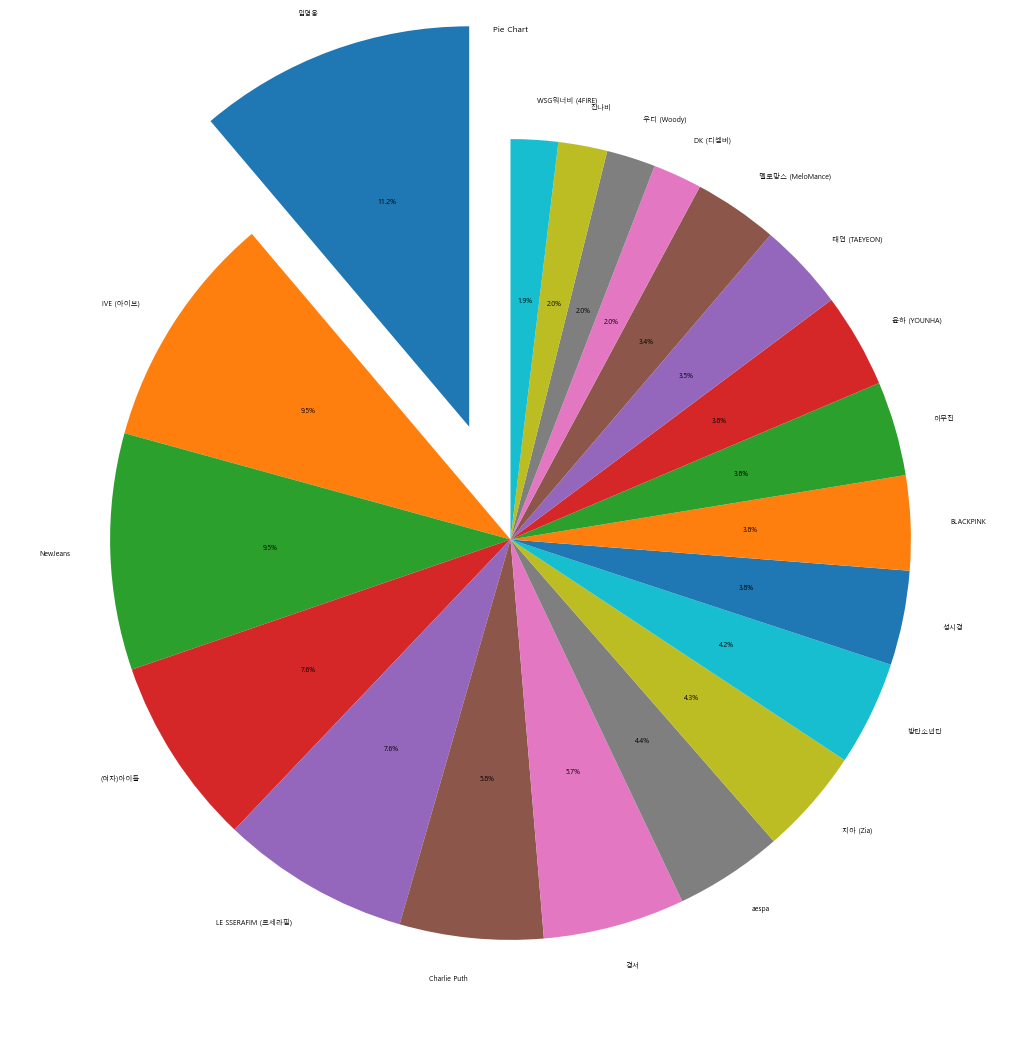

In [37]:
# 글자 크기
plt.rcParams['font.size'] = 5
# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (13, 13)
plt.figure()
plt.title("Pie Chart")
# label은 artistList로 20 종류의 아티스트 입력
# 소수 첫째자리까지 표현
plt.pie(data=xlsx2, labels=artistList, explode=explodeList,
        startangle=90, x='진입횟수', autopct="%0.1f%%")
plt.show()
plt.close()

## 3. 서브플롯

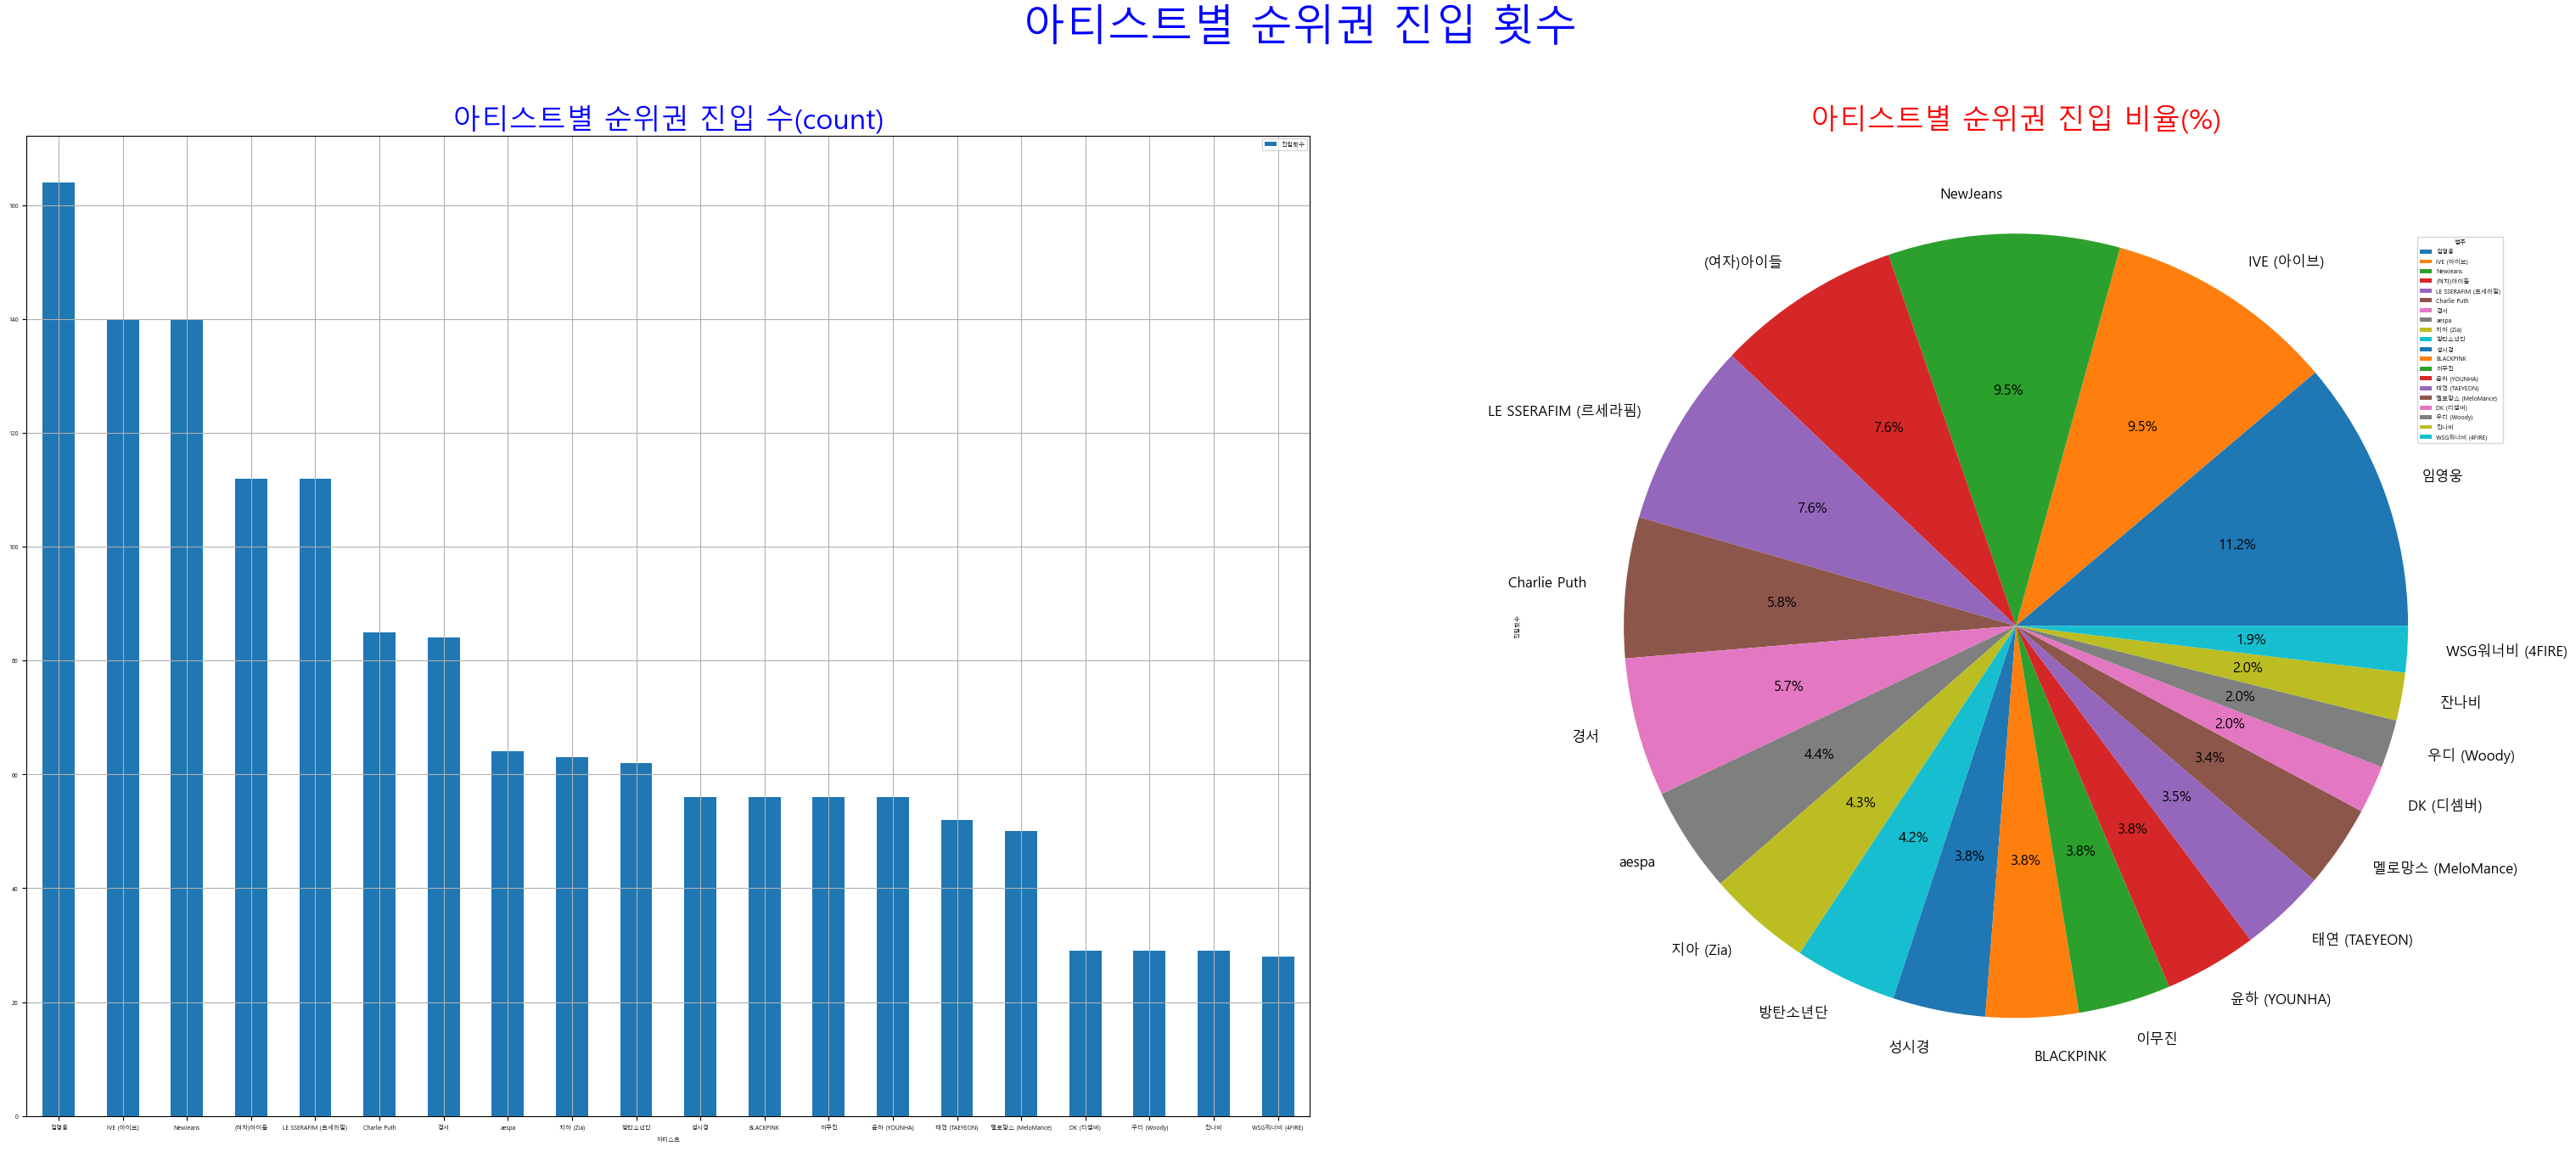

In [38]:
#--------------------------------------------------------------
# 1행 2열의 영역을 생성한다
#--------------------------------------------------------------
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(40, 15))

fig.subplots_adjust(wspace=0.05)

# 전체 제목
fig.suptitle("아티스트별 순위권 진입 횟수", fontsize = 36, color = 'blue')

#--------------------------------------------------------------
# 막대 그래프
#--------------------------------------------------------------

xlsx2.plot.bar(x="아티스트", y="진입횟수", rot=0, ax=ax1)
ax1.title.set_text("아티스트별 순위권 진입 수(count)")
ax1.title.set_fontsize(24)
ax1.title.set_color("#0000ff")
ax1.grid()

#--------------------------------------------------------------
# 파이 그래프
#--------------------------------------------------------------

# label은 artistList로 20 종류의 아티스트 입력, 소수 첫째자리까지 표현
xlsx2['진입횟수'].plot.pie(ax=ax2, labels = artistList, autopct="%0.1f%%", textprops={'color':"black", 'fontsize': 12})
ax2.title.set_text("아티스트별 순위권 진입 비율(%)")
ax2.title.set_fontsize(24)
ax2.title.set_color("#fc0303")
ax2.legend(labels=artistList, title='범주', bbox_to_anchor=(1.0, 0.9))

plt.show()
plt.close()

# 목표2 : Top5 아티스트의 기간별 언급 횟수를 보여주는 plot 그래프를 생성

1. 아티스트별 순위 언급 횟수를 확인한다
2. 순위 언급 횟수를 바탕으로 새로운 xlsx를 생성
3. pie 그래프로 아티스트별 진입 정도를 표현
4. subplots을 사용해 생성한 두 그래프를 하나의 subplot으로 시각화한다